In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.datasets as skd

china_image = skd.load_sample_image("china.jpg")
plt.imshow(china_image)
plt.show()

print(china_image.shape)

#(427, 640, 3) --> height, width, # of color channels

input_layer = tf.placeholder(dtype =tf.float32, shape = [None, 427, 640, 3])
conv_1 = tf.layers.conv2d(input_layer, filters=64, kernel_size=[2, 2], padding="same", activation=tf.nn.relu)
print(conv_1.shape)

# (None/? means that the placeholder is expecting something)

#Filters - changing the color pallet but find patterns instead of just changing color
#64 filters for the above convolutional network


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
        sess.run(init)
        output = sess.run(conv_1, feed_dict = {input_layer:[china_image]})

print(output[0].shape)

#plt.imshow(output[0]); this won't work because the computer can't print an image with 64 color channels

(427, 640, 64)


In [3]:
tf.reset_default_graph()
image_height = 28
image_width = 28
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

In [4]:
class CNN:
    
    def __init__(self, image_height, image_width, channels, num_classes): 
        self.input_layer = tf.placeholder(dtype = tf.float32, shape = [None, image_height, image_width, channels])
        conv_layer_1 = tf.layers.conv2d(self.input_layer, filters = 32, kernel_size = [2, 2], activation = tf.nn.relu)
        pooling_layer_1 = tf.layers.max_pooling2d(conv_layer_1, pool_size=[2,2], strides=2)
    
        #Number of image numbers
        num_classes = 10

        #Second convolutional and pooling layer to speed up the process by clearing more pixels
        conv_layer_2 = tf.layers.conv2d(self.input_layer, filters = 32, kernel_size = [2, 2], activation = tf.nn.relu)
        pooling_layer_2 = tf.layers.max_pooling2d(conv_layer_1, pool_size=[2,2], strides=2)
        
        flattened_pooling = tf.layers.flatten(pooling_layer_2)
        dense_layer = tf.layers.dense(flattened_pooling, 1024, activation = tf.nn.relu)
        dropout = tf.layers.dropout(dense_layer, rate = 0.4, training = True)
        outputs = tf.layers.dense(dropout, num_classes)
        
        self.choice = tf.argmax(outputs, axis=1) #because the output is only 1 dimensional there's only 1 axis/vector
        self.probability = tf.nn.softmax(outputs)
        self.labels = tf.placeholder(dtype = tf.float32, name = "labels")
        
        #short hand for the function returning two things
        self.accuracy, self.accuracy_op = tf.metrics.accuracy(self.labels, self.choice) 
        one_hot_labels = tf.one_hot(indices=tf.cast(self.labels, dtype=tf.int32),depth=num_classes)
        self.loss = tf.losses.softmax_cross_entropy(onehot_labels=one_hot_labels, logits=outputs)
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
        self.train_operation = optimizer.minimize(self.loss, global_step = tf.train.get_global_step())

W0627 08:48:34.928548 140651881477952 deprecation.py:323] From <ipython-input-4-613d6153ecba>:6: max_pooling2d (from tensorflow.python.layers.pooling) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
W0627 08:48:35.010866 140651881477952 deprecation.py:323] From <ipython-input-4-613d6153ecba>:15: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.
W0627 08:48:35.131935 140651881477952 deprecation.py:323] From <ipython-input-4-613d6153ecba>:16: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0627 08:48:35.326409 140651881477952 deprecation.py:323] From <ipython-input-4-613d6153ecba>:17: dropout (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for

0.09375
0.15625
0.13541667
0.1484375
0.15
0.140625
0.125
0.125
0.13541667
0.13125
0.12215909
0.13020833
0.1298077
0.12946428
0.125
0.12695312
0.125
0.125
0.121710524
0.1234375
0.12648809
0.12357955
0.1263587
0.123697914
0.12375
0.12740384
0.13078703
0.13058035
0.12823276
0.13229166
0.13407259
0.13378906
0.13068181
0.13143383
0.13303572
0.1310764
0.13260135
0.13651316
0.13701923
0.1375
0.13719513
0.1376488
0.13880815
0.13849431
0.1375
0.13722827
0.13630319
0.13411458
0.13520408
0.1325
0.13480392
0.13461539
0.13443395
0.13599537
0.1375
0.13839285
0.14144737
0.14224137
0.14300847
0.1453125
0.1460041
0.14616935
0.14732143
0.14746094
0.14759615
0.14867425
0.14972015
0.14981617
0.15081522
0.15267856
0.15360916
0.15581597
0.15625
0.1570946
0.15708333
0.15830593
0.15827923
0.15945514
0.15783228
0.159375
0.16010803
0.16158536
0.16076808
0.16034226
0.16102941
0.16388081
0.16343391
0.16477273
0.16432585
0.16458334
0.16517857
0.16610055
0.1670027
0.16888298
0.17072369
0.17317708
0.17364691
0.17506

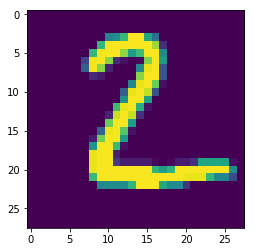

In [5]:
steps = 10000
batch_size = 32

test_img = x_test[1]
plt.imshow(test_img)
test_img = test_img.reshape(-1, 28, 28, 1)

x_train = x_train.reshape(-1, image_height, image_width, 1)

cnn = CNN(28, 28, 1, 10)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    step = 0
    while step < steps:
        none, currentAcurracy = sess.run((cnn.train_operation, cnn.accuracy_op), feed_dict = {cnn.input_layer:x_train[step:step+batch_size], cnn.labels:y_train[step:step+batch_size]})
        step += batch_size
        
        if steps % 100 == 0:
            print(currentAcurracy)
    
    print("\nIt is done.")
    
    #prints the number the computer thinks  is correct
    print("\n" + str(sess.run(cnn.choice, feed_dict = {cnn.input_layer:test_img})))
    
#Multiply steps and batch size, and then if the number is bigger than the total number of images,
#then drop the step value. MNIST has 60000 images.

In [6]:
#Testing and revising the CNN

test_img = x_test[1]
plt.imshow(test_img)
plt.show()

test_img = test_img.reshape(-1, 28, 28, 1)

x_train = x_train.reshape(-1, image_height, image_width, 1)
cnn = CNN(28, 28, 1, 10)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    step = 0
    while step < steps:
        sess.run((cnn.train_operation, cnn.accuracy_op), feed_dict = {cnn.input_layer:x_train[step:step+batch_size], cnn.labels:y_train[step:step+batch_size]})
        step += batch_size
    
    print("The computer thinks that image is " + str(sess.run(cnn.choice, feed_dict = {cnn.input_layer:test_img}))

SyntaxError: unexpected EOF while parsing (<ipython-input-6-06143a556f89>, line 19)